In [1]:
use Math::Polygons;
use Physics::Measure;

#This Jupyter notebook is intended to show how Physics::Measure can be combined with simple SVG drawings to illustrate
#concepts such as the resolution of forces at a point.

#This cell is needed to specialize the math classes such as Drawing, Point and Triangle provided by Math::Polygons
#by mixing in the Physics::Measure concepts such as Distance and Area. Usually this cell should be left unchanged.

class M-Drawing is Drawing {
    has Str $!scale-units = 'm';

    method scale() {
        @.elements.map(-> $e { $e.scale( $!scale-units ) }); 
    }   
}
class M-Point is Point {
    has Distance $.x;
    has Distance $.y;

    method scale( $su ) {
        $!x .= in( "$su" );     
        $!y .= in( "$su" );     
    }
}
class M-Polygon is Polygon {
    has M-Point @.points;
}
class M-Triangle is M-Polygon {
    has M-Point  $.apex is required;
    has Distance $.side is required;

    method scale( $su ) { 
        $!side .= in( "$su" );  
    } 
    method points() {
        ($!apex, |self.base-points)
    }
    method base-points() {
        my $y = $!apex.y + self.height;
        my \A = M-Point.new(:$y, x => $!apex.x - ( $!side / 2 ));
        my \C = M-Point.new(:$y, x => $!apex.x + ( $!side / 2 ));
        return( A, C );
    }
    method height() {
        sqrt($!side**2 - ($!side/2)**2)
    }
    method base() {
        $!side
    }
    method area( ) {
        ( $.height * $.base ) / 2
    }
}
#### here endeth the specializations

(M-Triangle)

In [2]:
use Physics::Measure;

#Here is the main part of this code example. This cell is a great place to experiment with values and units and to 
#see what is going on within the various triangular objects. Checkout the eg/Synopsis workbook to get a better idea 
#of what can be done with Physics::Measure and the usage of the ♎️ (libra) operator shorthand.

my $x ♎️ '200 m';
my $y ♎️ '160 m';
my $s ♎️ '100 ft';

my $apex     = M-Point.new(x => $x, y => $y),
my $triangle = M-Triangle.new( apex => $apex, side => $s );

my $drawing = M-Drawing.new( elements => [
    $triangle,
]);

#pre scale & draw
say "Triangle Side:     {$triangle.side}";
say "Triangle Area:     {$triangle.area}";

Triangle Side:     100 ft
Triangle Area:     4330.127018922193 ft2


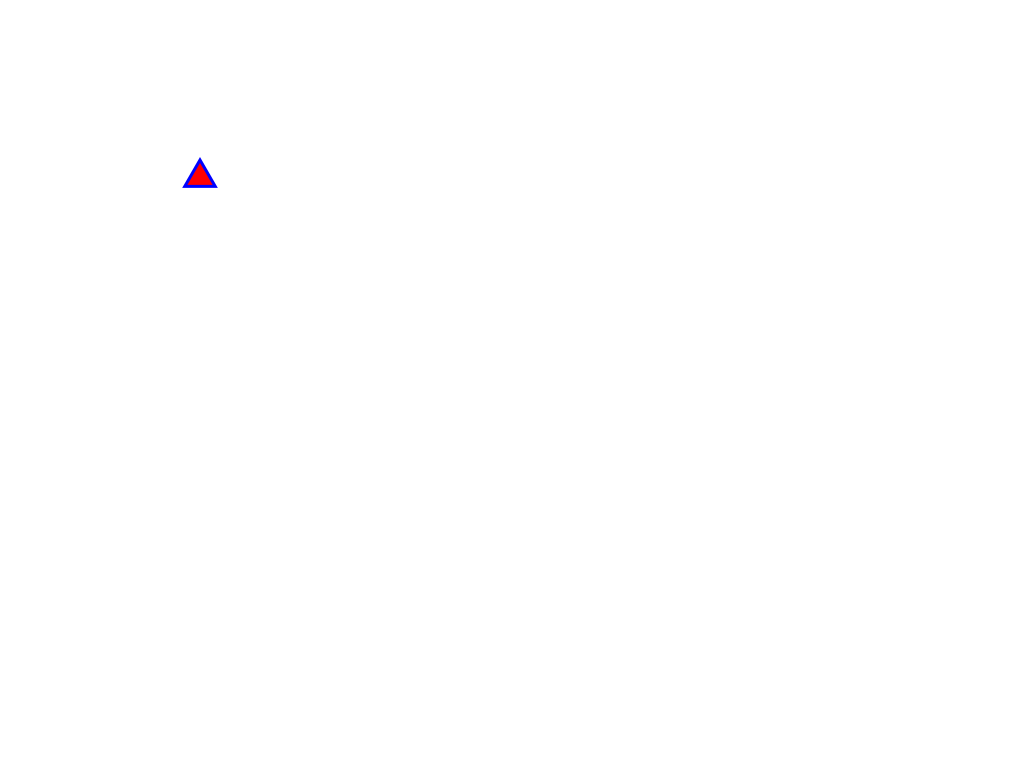

In [3]:
#Now to draw the objects
$drawing.scale;
$drawing.serialize.say;

In [4]:
#And finally to do some math and see how Physics::Measure automagically adapts the units and values

say "Triangle Side:     {$triangle.side}";
say "Triangle Apex:     {$triangle.apex}"; 
say "Triangle Height:   {$triangle.height}";
say "Triangle Area:     {$triangle.area}";

Triangle Side:     30.48 m
Triangle Apex:     200 m, 160 m
Triangle Height:   26.39645430734969 m
Triangle Area:     402.2819636440093 m2
